### Understanding the data
**Age:** insurance contractor age, years

**Sex:** insurance contractor gender, [female, male]

**BMI:** Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

**Children:** number of children covered by health insurance / Number of dependents

**Smoker:** smoking, [yes, no]

**Region:** the beneficiary’s residential area in the US, [northeast, southeast, southwest, northwest]

**Charges:** Individual medical costs billed by health insurance, **predicted value**

### Importing required library!!

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler,MinMaxScaler,PowerTransformer,FunctionTransformer
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from xgboost.sklearn import XGBRegressor
import joblib
import warnings
warnings.filterwarnings("ignore")


In [71]:
#Reading the dataset
df = pd.read_csv("insurance.csv")

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [72]:
#check for dublicated rows
print("Numbers of duplicated rows :",df.duplicated().sum())


Numbers of duplicated rows : 1


In [73]:
#dropping the duplicated rows 
df=df.drop_duplicates(keep="first")
print("After removing,number of duplicated rows are:",df.duplicated().sum())

After removing,number of duplicated rows are: 0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [10]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [74]:
num = df.select_dtypes(exclude='O')
cat = df.select_dtypes(include='O')

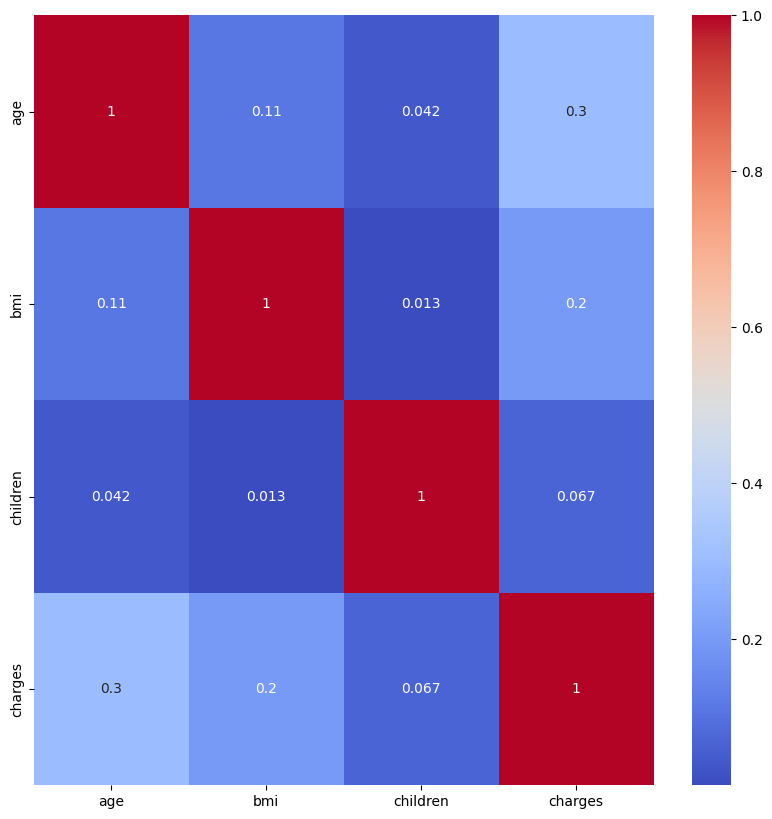

In [75]:
plt.figure(figsize=(10,10))

#plot heat map
sns.heatmap(num.corr(),annot=True,cmap="coolwarm",linecolor='black')
plt.show()

### EDA & Visualization

In [76]:
cat_col=["sex","smoker","region","children"]

In [77]:
df["sex"].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

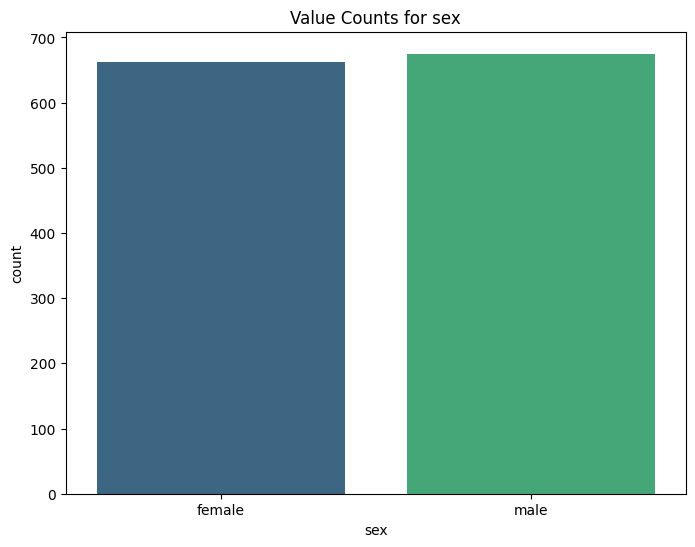

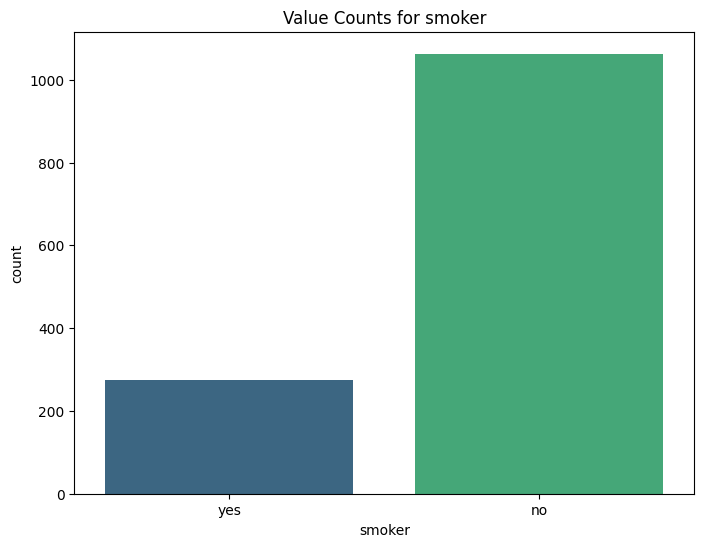

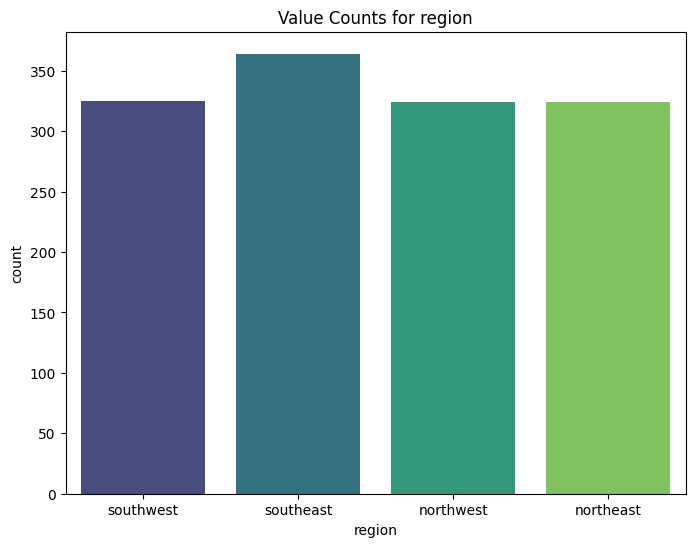

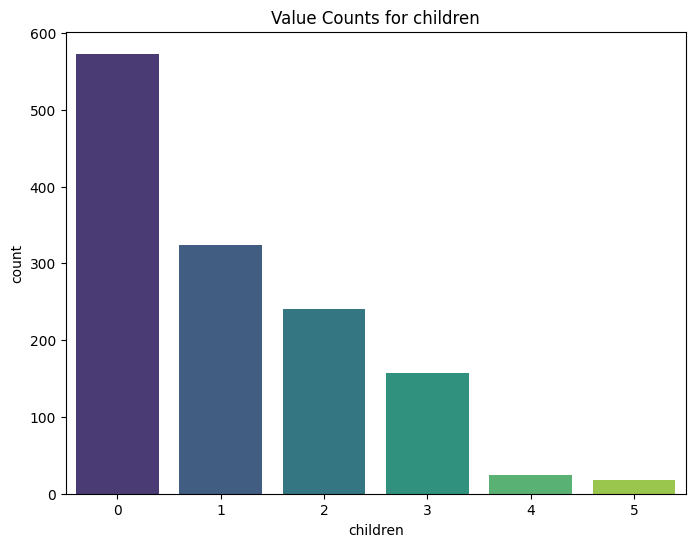

In [78]:
for column in cat_col:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=column, palette='viridis')
    plt.title(f'Value Counts for {column}')
    plt.show()

**Ater Ploting graph we get to know male smoke more as compare to females!!**

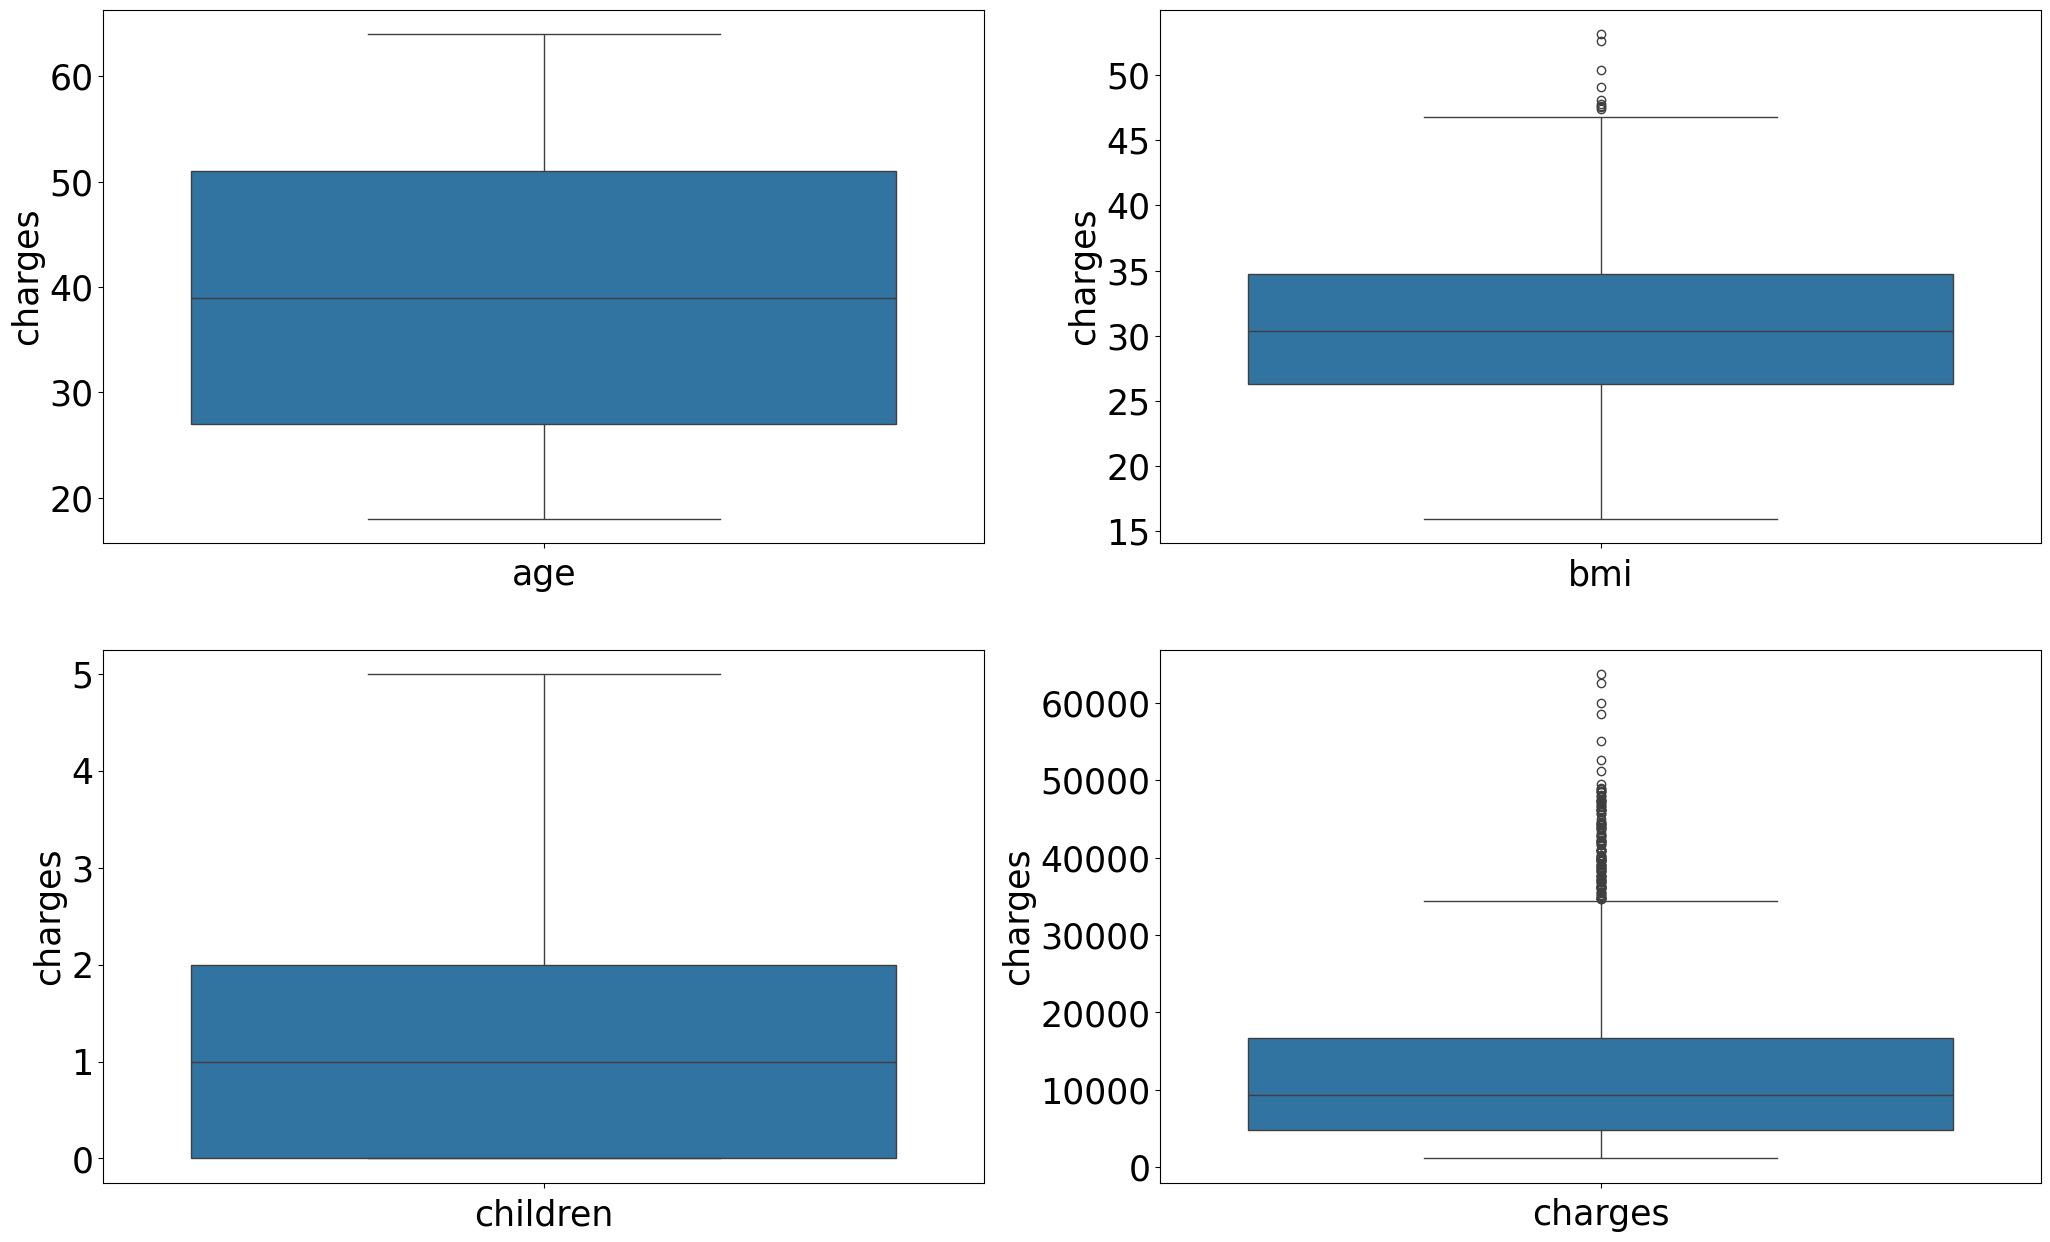

In [79]:
i=1
plt.figure(figsize=(25,90))
for col in num:
    
    plt.subplot(11,2,i)
    sns.boxplot(df[col])
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlabel(col,fontsize=25)
    plt.ylabel("charges",fontsize=25)
    i=i+1

plt.show()


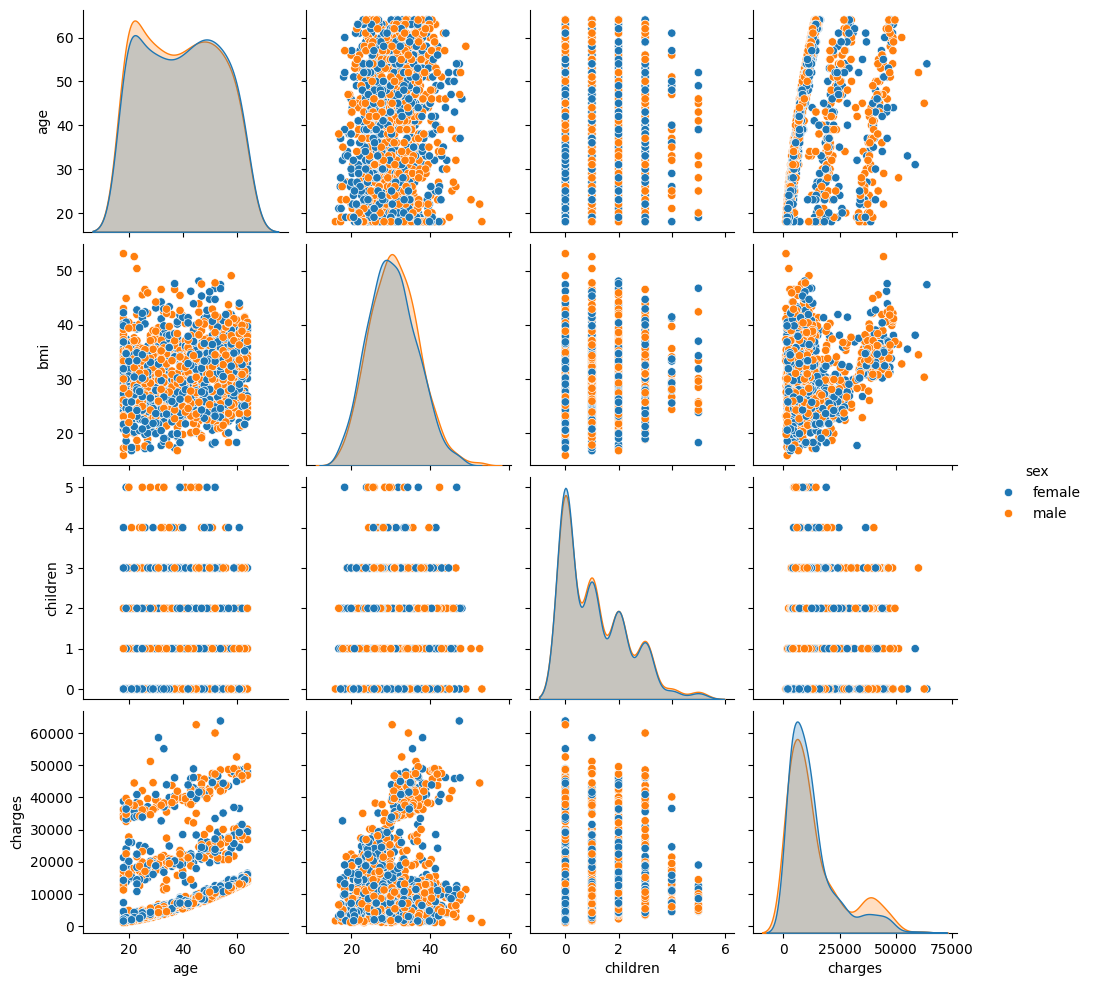

In [26]:
#anlysis numerical columns
sns.pairplot(df,hue="sex")

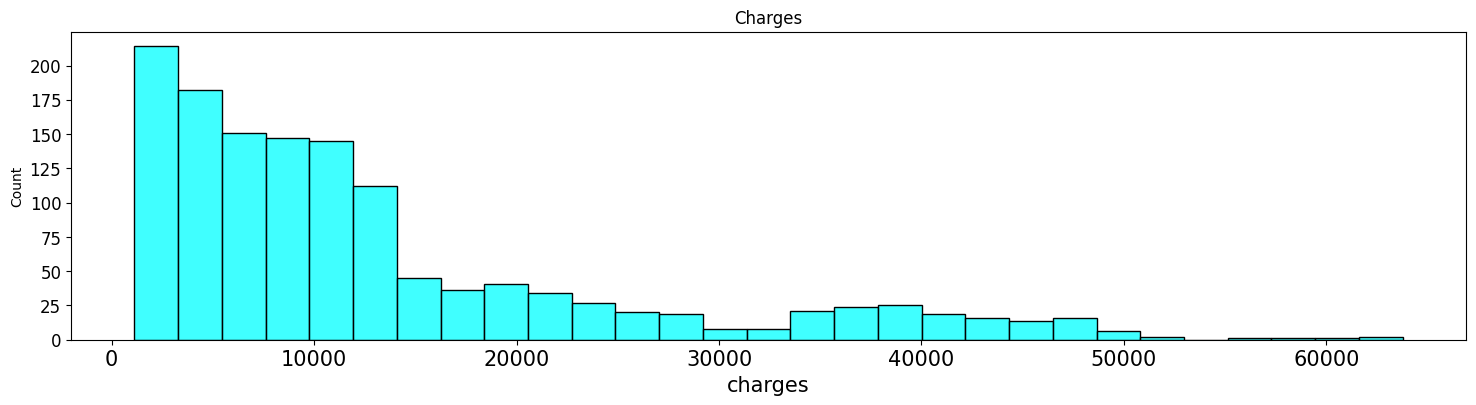

In [80]:
#analysis chareges columns
plt.figure(figsize=(18,4))
sns.histplot(df["charges"],color="#00FFFF")
plt.title("Charges")
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel("charges",fontsize=15)
plt.show()

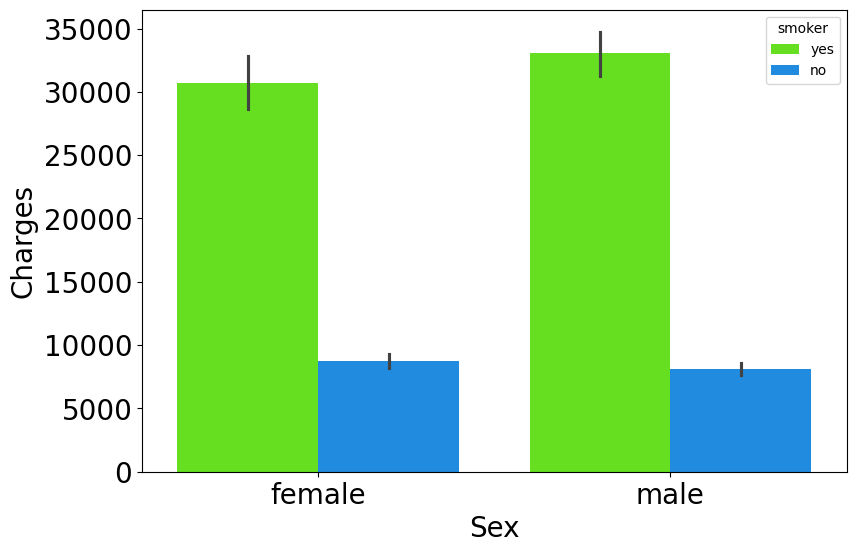

In [81]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.barplot(x='sex',y='charges', hue='smoker',data=df,palette="gist_rainbow")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Sex",fontsize=20)
plt.ylabel("Charges",fontsize=20) 
plt.show()


In [83]:

df['sex'] = df['sex'].map({'male':1,'female':0})
df['smoker'] = df['smoker'].map({'yes':1,'no':0})
df['region'] = df['region'].map({"northeast":0,"northwest":1,"southeast":2,"southwest":3})

In [84]:
#get the features and terget col
Y=df.charges
X=df.drop(["charges"],axis=1)
#train test split  
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
print("X_train shape: ",x_train.shape)
print("X_test shape: ",x_test.shape)
print()
print("Y_train shape: ",y_train.shape)
print("Y_test shape: ",y_test.shape)

X_train shape:  (1069, 6)
X_test shape:  (268, 6)

Y_train shape:  (1069,)
Y_test shape:  (268,)


In [140]:
x_train.head()

,age,sex,bmi,children,smoker,region
1114,23,1,24.510,0,0,0
968,21,1,25.745,2,0,0
599,52,0,37.525,2,0,1
170,63,1,41.470,0,0,2
275,47,0,26.600,2,0,0


In [90]:
def models_score(models, x_train, x_test, y_train, y_test):    
    scores = {'Model': [],  'Training Score': [], 'Testing Score': []}
    
    for name, model in models.items():
        # Training phase
        model.fit(x_train, y_train)
        y_train_pred = model.predict(x_train)
        train_score = model.score(x_train,y_train)
        
        # Testing phase
        y_test_pred = model.predict(x_test)
        test_score = model.score(x_test,y_test)
        
    
        # Appending scores to the dictionary
        scores['Model'].append(name)
        scores['Training Score'].append(train_score)
        scores['Testing Score'].append(test_score)
        
        
        # Printing the model name and scores
        print(f"Model: {name}")
        print(f"Training  Score: {train_score}")
        print(f"Testing  Score: {test_score}")

    
        print("\n<<<<------------------------------------------------------------->>>>\n")
   
    model_scores = pd.DataFrame(scores)
    
    # Check if columns exist before sorting
    if 'Training Score' in model_scores.columns and 'Testing Score' in model_scores.columns:
        model_scores = model_scores.sort_values(by=['Training Score', 'Testing Score'], ascending=[False, False])
    
    return model_scores


In [91]:
#initialize the multiple algorithms  of machine learning 
models = {"LinearRegression":LinearRegression(),
          "AdaBoost":AdaBoostRegressor(),
          "GradiantBoost":GradientBoostingRegressor(),
         "RandomForest":RandomForestRegressor(),
         "XgBoost": XGBRegressor(),
         "KNeighborsRegressor":KNeighborsRegressor()}

In [92]:
#Calling the function
c = models_score(models, x_train, x_test, y_train, y_test)

Model: LinearRegression
Training  Score: 0.7297182858804965
Testing  Score: 0.8068466322629111

<<<<------------------------------------------------------------->>>>

Model: AdaBoost
Training  Score: 0.8239754058416071
Testing  Score: 0.8628969477988063

<<<<------------------------------------------------------------->>>>

Model: GradiantBoost
Training  Score: 0.8931701840243523
Testing  Score: 0.9000548556548388

<<<<------------------------------------------------------------->>>>

Model: RandomForest
Training  Score: 0.975097274288003
Testing  Score: 0.881335751776114

<<<<------------------------------------------------------------->>>>

Model: XgBoost
Training  Score: 0.9967084843082681
Testing  Score: 0.8675872476172524

<<<<------------------------------------------------------------->>>>

Model: KNeighborsRegressor
Training  Score: 0.4122115169002336
Testing  Score: 0.04977435442244904

<<<<------------------------------------------------------------->>>>



In [93]:
model_scores
# algorithm results on our dataset

,Model,Training Score,Testing Score
4,XgBoost,0.996708,0.867587
3,RandomForest,0.975097,0.881336
2,GradiantBoost,0.893170,0.900055
1,AdaBoost,0.823975,0.862897
0,LinearRegression,0.729718,0.806847
5,KNeighborsRegressor,0.412212,0.049774


### Hyper parameter turning

In [94]:
xgb_model = XGBRegressor()

In [138]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Use an appropriate scoring metric for regression
    cv=5,  # Number of cross-validation folds
    verbose=2  # Higher value for more verbosity
)

# Fit the model to the data
grid_search.fit(x_train, y_train)

In [97]:
grid_search.best_params_

{'colsample_bytree': 1.0,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 50,
 'subsample': 0.9}

In [110]:
print('Accuracy Before Hyper parameter tuning','\n')
print(model_scores.iloc[0])
print("---------------------------------\n")

print('Accuracy after Hyper parameter tuning','\n')
xg_model = grid_search.best_estimator_
print("Training  score :- ",xg_model.score(x_train,y_train))
print("Testing  scorer :- ",xg_model.score(x_test,y_test))

Accuracy Before Hyper parameter tuning 

Model              XgBoost
Training Score    0.996708
Testing Score     0.867587
Name: 4, dtype: object
---------------------------------

Accuracy after Hyper parameter tuning 

Training  score :-  0.8715566688156305
Testing  scorer :-  0.9023843151113595


### Prediction

In [113]:
pred = xg_model.predict(x_test)
print("Root mean squared error :- ",np.sqrt(mean_squared_error(y_test,pred)))

Root mean squared error :-  4235.265522232674


In [115]:
comparison = pd.DataFrame({'actual':y_test,'prediction':pred})
comparison
# Prediction and actual charges

,actual,prediction
900,8688.85885,10487.103516
1064,5708.86700,7751.135742
1256,11436.73815,12657.718750
298,38746.35510,39239.648438
237,4463.20510,6493.845703
...,...,...
534,13831.11520,14323.773438
542,13887.20400,14332.787109
760,3925.75820,6892.341797
1284,47403.88000,47883.328125


In [116]:
comparison.describe()
#statistical result

,actual,prediction
count,268.000000,268.000000
mean,14272.007559,14381.228516
std,13581.026802,12179.114258
min,1131.506600,2764.430664
25%,4731.707250,6020.128418
50%,9535.650600,10510.158691
75%,17781.104820,15694.486084
max,63770.428010,47883.328125


In [135]:
comparison.describe().iloc[[1]]

,actual,prediction
mean,14272.007559,14381.228516


In [137]:
### save the model
joblib.dump(xg_model,'xgboost_model.lb')

['xgboost_model.lb']

In [145]:
model = joblib.load('xgboost_model.lb')

In [151]:
x_train

,age,sex,bmi,children,smoker,region
1114,23,1,24.510,0,0,0
968,21,1,25.745,2,0,0
599,52,0,37.525,2,0,1
170,63,1,41.470,0,0,2
275,47,0,26.600,2,0,0
...,...,...,...,...,...,...
1096,51,0,34.960,2,1,0
1131,27,1,45.900,2,0,3
1295,20,1,22.000,1,0,3
861,38,0,28.000,3,0,3


In [157]:
model.predict(x_train.iloc[[0]])[0]

4870.0493

### THANK YOU 😊